<a href="https://colab.research.google.com/github/harsha-9977/AIML/blob/main/24_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 40 x 40 matrix with range of 0 to 255
import numpy as np

matrix = np.random.randint(0, 255, size=(40,40), dtype=np.uint8)

print(matrix)

[[250   7 209 ... 195 167  20]
 [156 128 240 ...  38 133 217]
 [250 221 217 ...   3  21 109]
 ...
 [118 248  37 ...  22  90  63]
 [ 31  80  83 ...  38   6  57]
 [ 74  60 171 ...  15 168  29]]


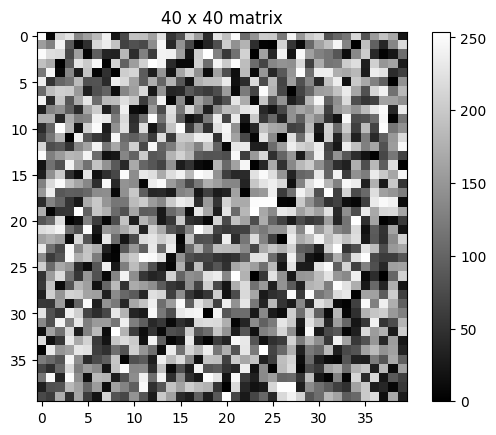

In [4]:
import matplotlib.pyplot as plt

plt.imshow(matrix, cmap='gray')
plt.title("40 x 40 matrix")
plt.colorbar()

In [8]:
# image pooling using max

def pooled_matrix(input_matrix,kernal_size=2,stride=2):
  output_shape = (
      input_matrix.shape[0] // stride,
      input_matrix.shape[1] // stride
  )

  pooled = np.zeros((20,20), dtype=np.uint8)

  for i in range(0, input_matrix.shape[0], stride):
    for j in range(0, input_matrix.shape[1], stride):
      patch = input_matrix[i:i+kernal_size, j:j+kernal_size]
      if patch.shape == (kernal_size,kernal_size):
        pooled[i//stride,j//stride] = np.max(patch)

  return pooled
pool = pooled_matrix(matrix)
print(pooled_matrix(matrix))

[[250 240 158 240 193 193 246 146 207 227 249 178 203 244 202 217 244 214
  195 217]
 [250 217 226 245 209 208 252 239 207 254 251 209 160 242 248 171 203 221
  207 163]
 [244 135 195  83 236 212 173 178 210 190 234 219 184 156 251 238 237 200
  235 145]
 [243 206 230 184 222 215 240 136 162 125 228 171 251 147 182 245 234 165
  241 184]
 [174 172 164 239 238 111 252 223 217 236 234 236 106 145 170 194 247 186
  250 233]
 [118 253 238 250 247 219 220 251 238 235 245  74 227 222 220 208 203 187
  253 218]
 [251 182 242 242 168 207 247 209 181 198 248 233 214 237 209 238 236 191
  165 248]
 [144 241 229 195 250 230 221 241 252 241 161 245 249 148 203 231 241 173
  234 244]
 [236 249 164 248 147 199 248 154 140 173 161 197 238 215 243 252 247 236
  221 200]
 [174 101 252 199 119 202 155 235 228 164 226 254 252 232 201 227 142 233
  248 240]
 [227 243 251 150 194 200 211 201 254 213 193 162 172 217 245 196 133 254
  162 162]
 [233 247 214 229 109 219 232 235 192 187 237 219 197 235 189 241

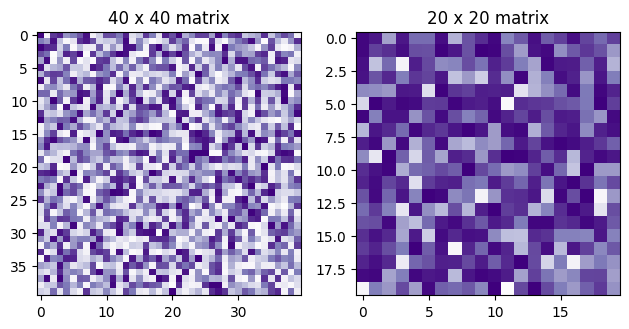

In [15]:
plt.subplot(1,2,1)
plt.imshow(matrix, cmap='Purples')
plt.title("40 x 40 matrix")

plt.subplot(1,2,2)
plt.imshow(pool, cmap='Purples')
plt.title("20 x 20 matrix")

plt.tight_layout()
plt.show()

In [12]:
# matrix to image
from PIL import Image

img = Image.fromarray(matrix)
img2 = Image.fromarray(pool)

img.save("matrix.png")
img.save("pooled_matrix.png")

array([[ 18,  22,  11, ..., 123, 126, 127],
       [146,  86,  22, ..., 125, 128, 129],
       [ 47,  87,  93, ..., 129, 131, 133],
       ...,
       [ 43,  28,  31, ...,  64,  66,  68],
       [ 29,  49,  54, ...,  61,  62,  63],
       [ 22,  67,  74, ...,  58,  59,  60]], dtype=uint8)
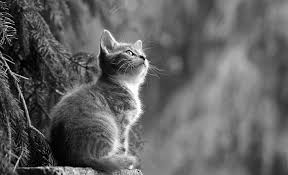

In [16]:
image = Image.open("i1.jfif").convert('L')
arr = np.array(image)
arr

array([[127, 126, 123, ...,  11,  22,  18],
       [129, 128, 125, ...,  22,  86, 146],
       [133, 131, 129, ...,  93,  87,  47],
       ...,
       [ 68,  66,  64, ...,  31,  28,  43],
       [ 63,  62,  61, ...,  54,  49,  29],
       [ 60,  59,  58, ...,  74,  67,  22]], dtype=uint8)
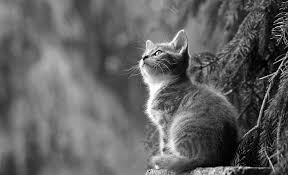

In [18]:
flipped = np.fliplr(arr)
flipped

array([[ 22,  67,  74, ...,  58,  59,  60],
       [ 29,  49,  54, ...,  61,  62,  63],
       [ 43,  28,  31, ...,  64,  66,  68],
       ...,
       [ 47,  87,  93, ..., 129, 131, 133],
       [146,  86,  22, ..., 125, 128, 129],
       [ 18,  22,  11, ..., 123, 126, 127]], dtype=uint8)
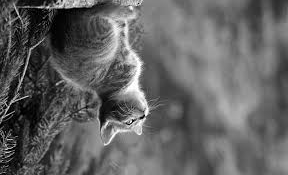

In [19]:
flipped = np.flipud(arr)
flipped

array([[237, 233, 244, ..., 132, 129, 128],
       [109, 169, 233, ..., 130, 127, 126],
       [208, 168, 162, ..., 126, 124, 122],
       ...,
       [212, 227, 224, ..., 191, 189, 187],
       [226, 206, 201, ..., 194, 193, 192],
       [233, 188, 181, ..., 197, 196, 195]], dtype=uint8)
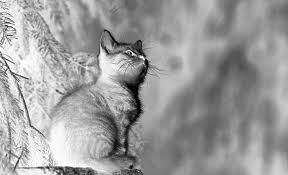

In [21]:
inverted = 255 - arr
inverted

array([[ 18, 146,  47, ...,  43,  29,  22],
       [ 22,  86,  87, ...,  28,  49,  67],
       [ 11,  22,  93, ...,  31,  54,  74],
       ...,
       [123, 125, 129, ...,  64,  61,  58],
       [126, 128, 131, ...,  66,  62,  59],
       [127, 129, 133, ...,  68,  63,  60]], dtype=uint8)
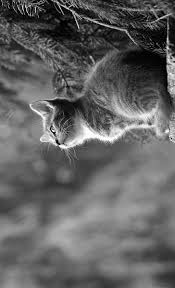

In [17]:
transposed_img = arr.T
transposed_img

In [34]:
import cv2
import numpy as np
from google.colab import files

def reverse_video(input_path, output_path):
  cap = cv2.VideoCapture(input_path)

  # video properties
  fps = cap.get(cv2.CAP_PROP_FPS)
  width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

  # video writer setup for output
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')
  out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

  # read and store
  frames = []
  while True:
    read, frame = cap.read()
    if not read:
      break
    frames.append(frame)

  # writing in reverse
  for frame in reversed(frames):
    out.write(frame)

  cap.release()
  out.release()

uploaded = files.upload()
input_filename = next(iter(uploaded))
output_filename = 'reversed_' + input_filename

reverse_video(input_filename,output_filename)

files.download(output_filename)

Saving ball.mp4 to ball.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>